In [65]:
import nibabel as nib
import nilearn.plotting as plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import hcp_utils as hcp
import nilearn as nl

In [68]:
mmp=hcp.mmp


dict_keys(['ids', 'map_all', 'labels', 'rgba', 'nontrivial_ids'])

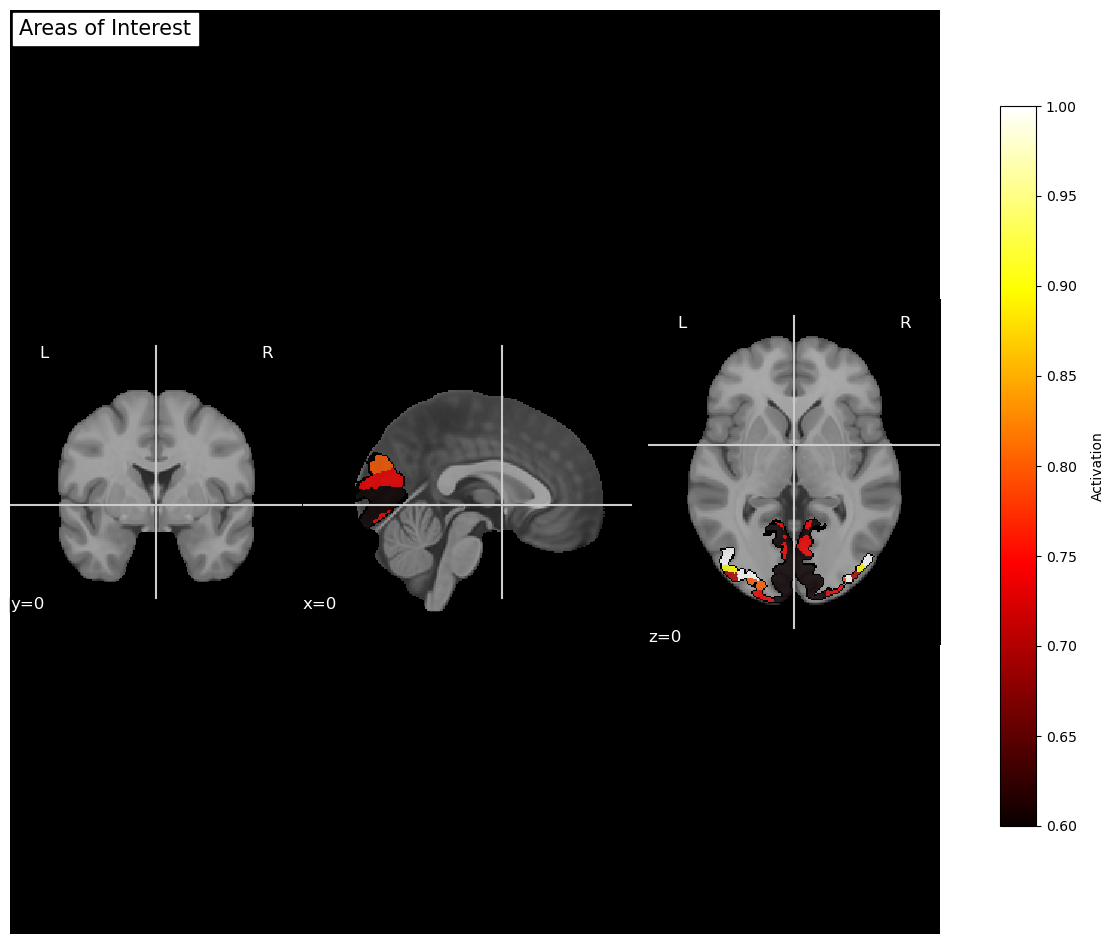

In [9]:
import numpy as np
import nilearn.plotting as nip
import matplotlib.pyplot as plt
from nilearn.image import load_img, new_img_like
from nilearn.datasets import load_mni152_template
from matplotlib.colors import ListedColormap
from scipy.ndimage import binary_dilation
import matplotlib as mpl

# Load the Glasser 360 parcellation image
parcellation_img = load_img('C:/Users/user/Documents/l/glasser360-master/glasser360MNI.nii.gz')

# Load the node names
with open('C:/Users/user/Documents/l/glasser360-master/glasser360NodeNames.txt', 'r') as f:
    node_names = [line.strip() for line in f]

# Load the MNI152 template brain image
template_img = load_mni152_template()

# Areas to visualize with desired colors
areas_to_visualize = {
    'V1': (0, 0, 0),  # Red
    'V2': (0, 0, 0),  # Green
    'V3': (0, 0, 0),  # Blue
    'V3A': (0, 0, 0),  # Purple
    'V3B': (0, 0, 0),  # Orange
    'V4': (0, 0, 0),  # Yellow
    'LO1': (0, 0, 0),  # Magenta
    'LO2': (0, 0, 0)   # Cyan
}

area_data = {}
for area in areas_to_visualize:
    labels = []
    for i, name in enumerate(node_names):
        if area in name:
            labels.append(i + 1)  # Add 1 because labels are 1-indexed
    mask = np.isin(parcellation_img.get_fdata(), labels)
    area_data[area] = {'mask': mask, 'color': areas_to_visualize[area]}

# Generate random activation values for each area
animate_activations = [0.6,0.74,0.8,1,1,1,0.7,0.9]
activations = np.array(activations)

# Create a colormap based on the 'hot' colormap (or any other suitable colormap)
norm = mpl.colors.Normalize(vmin=activations.min(), vmax=activations.max())
cmap = plt.cm.ScalarMappable(norm=norm, cmap='hot')

# Plot all areas together on one brain
fig, ax = plt.subplots(figsize=(12, 12))  # Increase figure size
display = nip.plot_anat(template_img, figure=fig, axes=ax,
                       cut_coords=(0, 0, 0), title="Areas of Interest")

# Create a combined mask for all areas
combined_mask = np.zeros_like(parcellation_img.get_fdata(), dtype=bool)

for i, (area, data) in enumerate(area_data.items()):
    masked_parcellation = new_img_like(parcellation_img, data['mask'])
    

    color = cmap.to_rgba(activations[i])[:3]  

    display.add_overlay(masked_parcellation, cmap=ListedColormap([color]), 
                       alpha=0.8, colorbar=False)

    # Add to the combined mask
    combined_mask |= data['mask']

# Create a boundary mask using dilation
boundary_mask = binary_dilation(combined_mask) ^ combined_mask

# Overlay the boundary mask in black
boundary_img = new_img_like(parcellation_img, boundary_mask)
display.add_overlay(boundary_img, cmap=ListedColormap(['black']), 
                   alpha=1, colorbar=False)

cax = fig.add_axes([0.95, 0.2, 0.03, 0.6])  # Adjust position and size as needed

# Add the colorbar to the dedicated axes
cbar = plt.colorbar(cmap, cax=cax, label='Activation')
cbar.ax.get_yaxis().labelpad = 10  

nip.show()

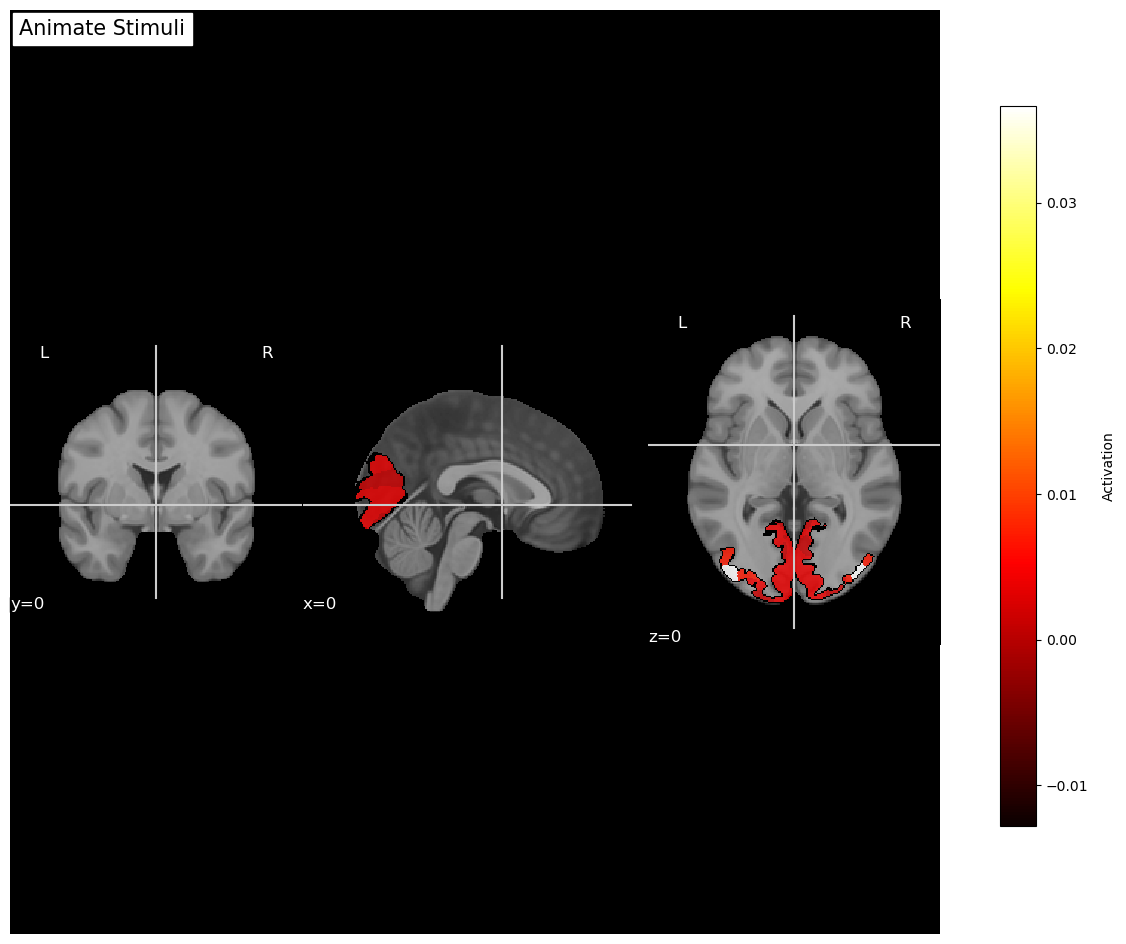

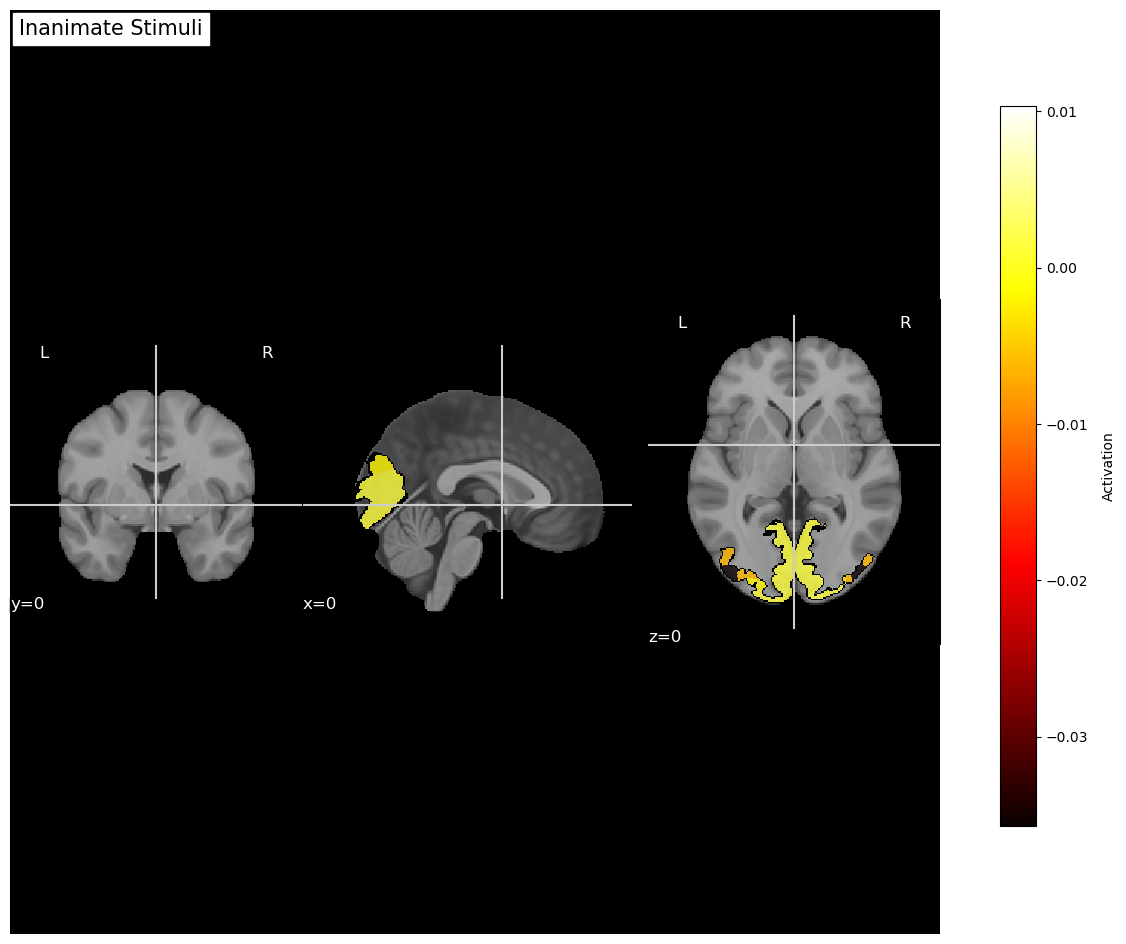

In [13]:
import numpy as np
import nilearn.plotting as nip
import matplotlib.pyplot as plt
from nilearn.image import load_img, new_img_like
from nilearn.datasets import load_mni152_template
from matplotlib.colors import ListedColormap
from scipy.ndimage import binary_dilation
import matplotlib as mpl
import nibabel as nib

# Load the Glasser 360 parcellation image
parcellation_img = load_img('C:/Users/user/Documents/l/glasser360-master/glasser360MNI.nii.gz')

# Load the node names
with open('C:/Users/user/Documents/l/glasser360-master/glasser360NodeNames.txt', 'r') as f:
    node_names = [line.strip() for line in f]

# Load the MNI152 template brain image
template_img = load_mni152_template()

# Areas to visualize with desired colors
areas_to_visualize = {
    'V1': (0, 0, 0),  # Red
    'V2': (0, 0, 0),  # Green
    'V3': (0, 0, 0),  # Blue
    'V3A': (0, 0, 0),  # Purple
    'V3B': (0, 0, 0),  # Orange
    'V4': (0, 0, 0),  # Yellow
    'LO1': (0, 0, 0),  # Magenta
    'LO2': (0, 0, 0)   # Cyan
}

# Activations for each area (animate and inanimate)
animate_activations = {
    'V1': 0.004387682743745417,
    'V2': 0.0018622016913930242,
    'V3': 0.004169239015906557,
    'V3A': 0.0023358022142150243,
    'V3B': -0.012797822622114966,
    'V4': 0.006939179217989513,
    'LO1': 0.03665441993234403,
    'LO2': 0.03665441993234403
}

inanimate_activations = {
    'V1': 0.0016871235934424955,
    'V2': 0.0012484734609683374,
    'V3': -0.002067703521131338,
    'V3A': -0.004730418787386212,
    'V3B': 0.010346965951391682,
    'V4': -0.006138067840148508,
    'LO1': -0.03571986389006982,
    'LO2': -0.03571986389006982
}

# --- Function to create NIfTI files with activations ---
def create_activation_nii(activations, filename):
    activation_data = np.zeros_like(parcellation_img.get_fdata())
    for area, activation in activations.items():
        if area in node_names:
            roi_index = node_names.index(area) + 1
            roi_mask = parcellation_img.get_fdata() == roi_index
            activation_data[roi_mask] = activation
    activation_img = new_img_like(parcellation_img, activation_data)
    nib.save(activation_img, filename)

# --- Create NIfTI files ---
create_activation_nii(animate_activations, "animate_activations.nii.gz")
create_activation_nii(inanimate_activations, "inanimate_activations.nii.gz")

# --- Plotting Function ---
def plot_brain_with_activations(activations, title):
    fig, ax = plt.subplots(figsize=(12, 12))
    display = nip.plot_anat(template_img, figure=fig, axes=ax,
                           cut_coords=(0, 0, 0), title=title)

    # Create a colormap based on the 'hot' colormap
    norm = mpl.colors.Normalize(vmin=min(activations.values()), vmax=max(activations.values()))
    cmap = plt.cm.ScalarMappable(norm=norm, cmap='hot')

    combined_mask = np.zeros_like(parcellation_img.get_fdata(), dtype=bool)

    for i, (area, activation) in enumerate(activations.items()):
        if area in areas_to_visualize:  # Use areas_to_visualize for masking
            labels = []
            for j, name in enumerate(node_names):
                if area in name:
                    labels.append(j + 1)
            mask = np.isin(parcellation_img.get_fdata(), labels)
            masked_parcellation = new_img_like(parcellation_img, mask)

            color = cmap.to_rgba(activation)[:3]

            display.add_overlay(masked_parcellation, cmap=ListedColormap([color]),
                               alpha=0.8, colorbar=False)

            combined_mask |= mask

    # Boundary mask
    boundary_mask = binary_dilation(combined_mask) ^ combined_mask
    boundary_img = new_img_like(parcellation_img, boundary_mask)
    display.add_overlay(boundary_img, cmap=ListedColormap(['black']),
                       alpha=1, colorbar=False)

    # Colorbar
    cax = fig.add_axes([0.95, 0.2, 0.03, 0.6])
    cbar = plt.colorbar(cmap, cax=cax, label='Activation')
    cbar.ax.get_yaxis().labelpad = 10

    nip.show()

# --- Plot Animate and Inanimate ---
plot_brain_with_activations(animate_activations, "Animate Stimuli")
plot_brain_with_activations(inanimate_activations, "Inanimate Stimuli")

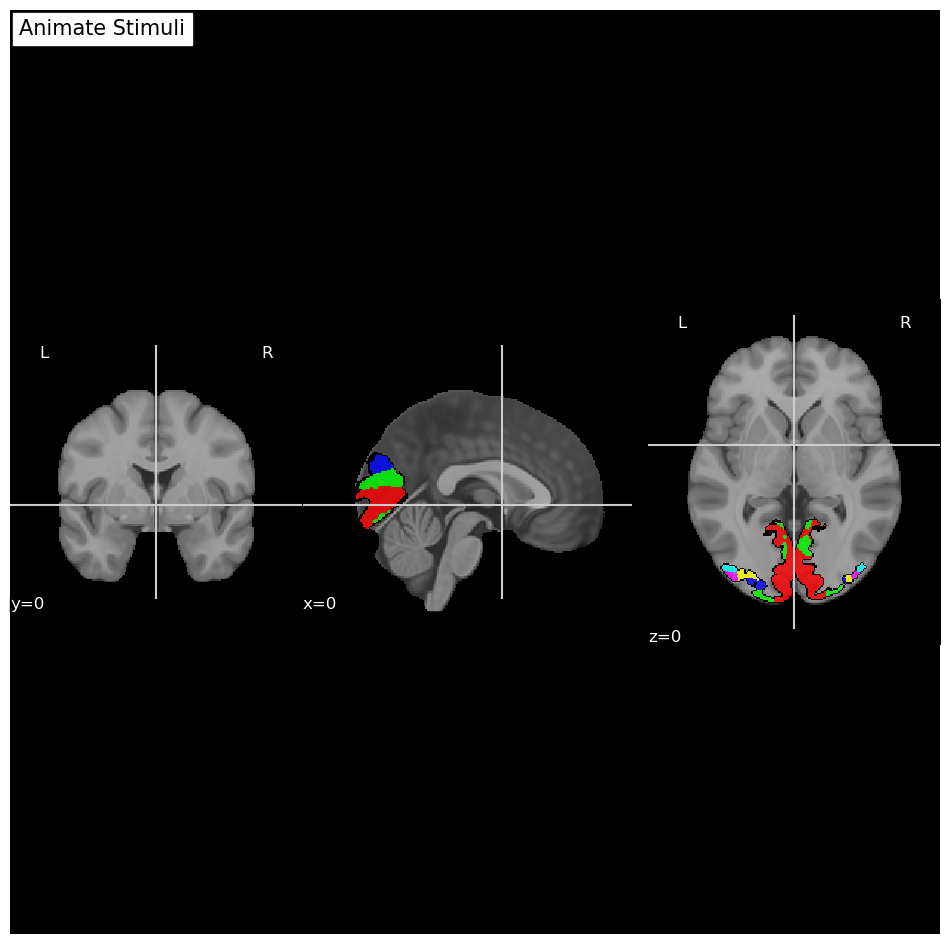

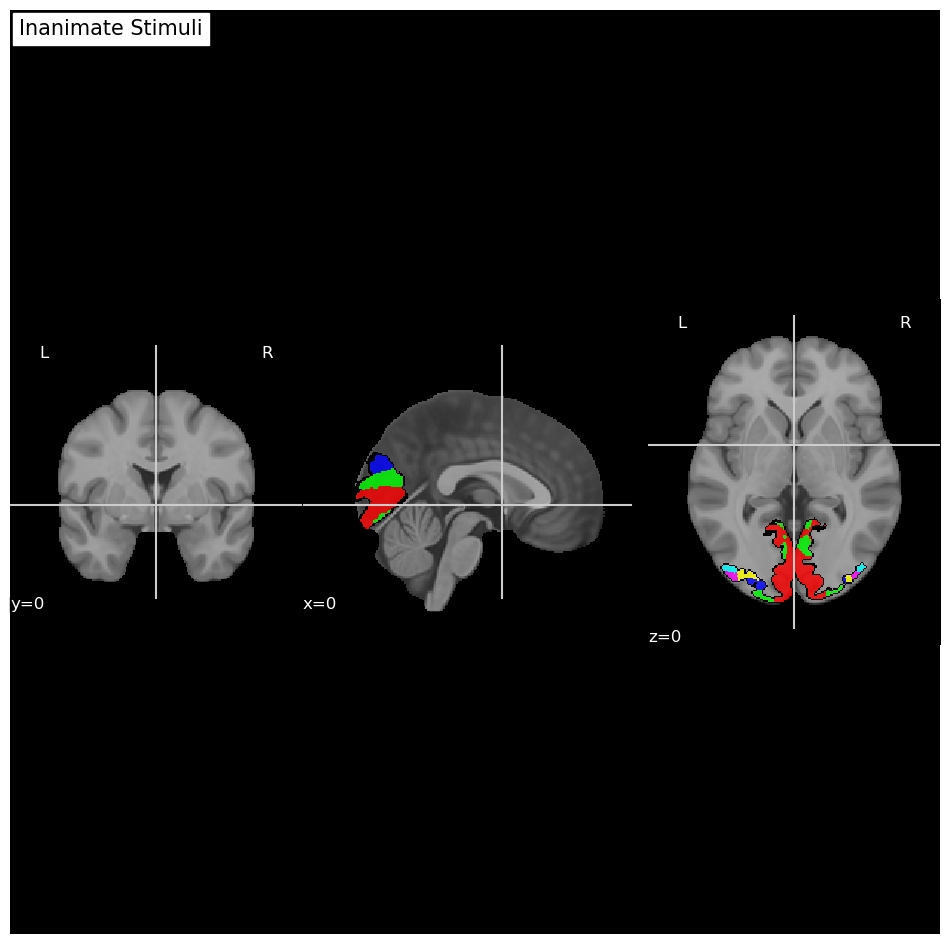

In [15]:
import numpy as np
import nilearn.plotting as nip
import matplotlib.pyplot as plt
from nilearn.image import load_img, new_img_like
from nilearn.datasets import load_mni152_template
from matplotlib.colors import ListedColormap
from scipy.ndimage import binary_dilation
import matplotlib as mpl
import nibabel as nib

# Load the Glasser 360 parcellation image
parcellation_img = load_img('C:/Users/user/Documents/l/glasser360-master/glasser360MNI.nii.gz')

# Load the node names
with open('C:/Users/user/Documents/l/glasser360-master/glasser360NodeNames.txt', 'r') as f:
    node_names = [line.strip() for line in f]

# Load the MNI152 template brain image
template_img = load_mni152_template()

# Areas to visualize with desired colors
areas_to_visualize = {
    'V1': (1, 0, 0),  # Red
    'V2': (0, 1, 0),  # Green
    'V3': (0, 0, 1),  # Blue
    'V3A': (0.5, 0, 0.5),  # Purple
    'V3B': (1, 0.65, 0),  # Orange
    'V4': (1, 1, 0),  # Yellow
    'LO1': (1, 0, 1),  # Magenta
    'LO2': (0, 1, 1)   # Cyan
}

# Activations for each area (animate and inanimate)
animate_activations = {
    'V1': 0.004387682743745417,
    'V2': 0.0018622016913930242,
    'V3': 0.004169239015906557,
    'V3A': 0.0023358022142150243,
    'V3B': -0.012797822622114966,
    'V4': 0.006939179217989513,
    'LO1': 0.03665441993234403,
    'LO2': 0.03665441993234403
}

inanimate_activations = {
    'V1': 0.0016871235934424955,
    'V2': 0.0012484734609683374,
    'V3': -0.002067703521131338,
    'V3A': -0.004730418787386212,
    'V3B': 0.010346965951391682,
    'V4': -0.006138067840148508,
    'LO1': -0.03571986389006982,
    'LO2': -0.03571986389006982
}

# --- Function to create NIfTI files with activations ---
def create_activation_nii(activations, filename):
    activation_data = np.zeros_like(parcellation_img.get_fdata())
    for area, activation in activations.items():
        for hemisphere in ['Right_', 'Left_']:
            full_area_name = hemisphere + area
            if full_area_name in node_names:
                roi_index = node_names.index(full_area_name) + 1
                roi_mask = parcellation_img.get_fdata() == roi_index
                activation_data[roi_mask] = activation
    activation_img = new_img_like(parcellation_img, activation_data)
    nib.save(activation_img, filename)

# --- Create NIfTI files ---
create_activation_nii(animate_activations, "animate_activations.nii.gz")
create_activation_nii(inanimate_activations, "inanimate_activations.nii.gz")

# --- Plotting Function ---
def plot_brain_with_activations(activations, title):
    fig, ax = plt.subplots(figsize=(12, 12))
    display = nip.plot_anat(template_img, figure=fig, axes=ax,
                           cut_coords=(0, 0, 0), title=title)

    combined_mask = np.zeros_like(parcellation_img.get_fdata(), dtype=bool)

    for area, activation in activations.items():
        for hemisphere in ['Right_', 'Left_']:
            full_area_name = hemisphere + area
            if full_area_name in node_names:
                roi_index = node_names.index(full_area_name) + 1
                roi_mask = parcellation_img.get_fdata() == roi_index
                masked_parcellation = new_img_like(parcellation_img, roi_mask)

                color = areas_to_visualize[area] # Direct color from dictionary
                display.add_overlay(masked_parcellation, cmap=ListedColormap([color]),
                                   alpha=0.8, colorbar=False)

                combined_mask |= roi_mask

    # Boundary mask
    boundary_mask = binary_dilation(combined_mask) ^ combined_mask
    boundary_img = new_img_like(parcellation_img, boundary_mask)
    display.add_overlay(boundary_img, cmap=ListedColormap(['black']),
                       alpha=1, colorbar=False)

    nip.show()


# --- Plot Animate and Inanimate ---
plot_brain_with_activations(animate_activations, "Animate Stimuli")
plot_brain_with_activations(inanimate_activations, "Inanimate Stimuli")

In [17]:
import numpy as np
import nibabel as nib

# Load the NIfTI files
animate_img = nib.load("animate_activations.nii.gz")
inanimate_img = nib.load("inanimate_activations.nii.gz")

# Get the activation data
animate_data = animate_img.get_fdata()
inanimate_data = inanimate_img.get_fdata()

# Print some statistics for each NIfTI file
print("Animate Activations:")
print("  Min:", np.min(animate_data))
print("  Max:", np.max(animate_data))
print("  Mean:", np.mean(animate_data))
print("  Non-zero voxels:", np.count_nonzero(animate_data))

print("\nInanimate Activations:")
print("  Min:", np.min(inanimate_data))
print("  Max:", np.max(inanimate_data))
print("  Mean:", np.mean(inanimate_data))
print("  Non-zero voxels:", np.count_nonzero(inanimate_data))

# --- Check specific ROI activations ---

for area in areas_to_visualize.keys():
    for hemisphere in ['Right_', 'Left_']:
        full_area_name = hemisphere + area
        if full_area_name in node_names:
            roi_index = node_names.index(full_area_name) + 1
            roi_mask = parcellation_img.get_fdata() == roi_index

            # Extract the activation values for the ROI
            animate_roi_activation = animate_data[roi_mask][0]  # Get the first element (they should all be the same)
            inanimate_roi_activation = inanimate_data[roi_mask][0]

            # Print the activations
            print(f"\nROI: {full_area_name}")
            print(f"  Animate Activation: {animate_roi_activation}")
            print(f"  Inanimate Activation: {inanimate_roi_activation}")

Animate Activations:
  Min: -0.012797822622114966
  Max: 0.03665441993234403
  Mean: 4.73945946900719e-05
  Non-zero voxels: 62514

Inanimate Activations:
  Min: -0.03571986389006982
  Max: 0.010346965951391682
  Mean: -1.9600529994385403e-05
  Non-zero voxels: 62514

ROI: Right_V1
  Animate Activation: 0.004387682743745417
  Inanimate Activation: 0.0016871235934424955

ROI: Left_V1
  Animate Activation: 0.004387682743745417
  Inanimate Activation: 0.0016871235934424955

ROI: Right_V2
  Animate Activation: 0.0018622016913930242
  Inanimate Activation: 0.0012484734609683374

ROI: Left_V2
  Animate Activation: 0.0018622016913930242
  Inanimate Activation: 0.0012484734609683374

ROI: Right_V3
  Animate Activation: 0.004169239015906557
  Inanimate Activation: -0.002067703521131338

ROI: Left_V3
  Animate Activation: 0.004169239015906557
  Inanimate Activation: -0.002067703521131338

ROI: Right_V3A
  Animate Activation: 0.0023358022142150243
  Inanimate Activation: -0.004730418787386212

RO

d:\Anaconda\Lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


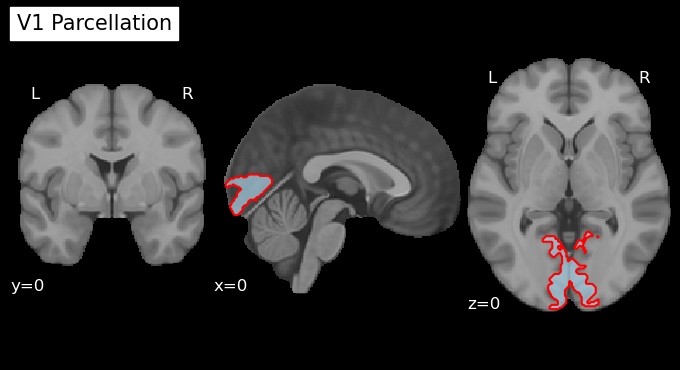

In [125]:
import numpy as np
import nilearn.plotting as nip
from nilearn.image import load_img, new_img_like, resample_to_img, math_img
from nilearn.datasets import load_mni152_template

# Load the Glasser 360 parcellation image
parcellation_img = load_img('C:/Users/user/Documents/l/glasser360-master/glasser360MNI.nii.gz')

# Load the node names
with open('C:/Users/user/Documents/l/glasser360-master/glasser360NodeNames.txt', 'r') as f:
    node_names = [line.strip() for line in f]

# Load the MNI152 template brain image
template_img = load_mni152_template()

# Area to visualize (e.g., V1)
area_to_visualize = 'V1'

# Find the corresponding labels for the area
labels = [i + 1 for i, name in enumerate(node_names) if area_to_visualize in name]

# Create a mask for the specified area
parcellation_data = parcellation_img.get_fdata()
mask = np.isin(parcellation_data, labels)

# Generate a more precise mask image
area_mask_img = new_img_like(parcellation_img, mask.astype(np.float32))

# Resample mask to the template image for better alignment (if needed)
resampled_mask_img = resample_to_img(area_mask_img, template_img, interpolation='nearest')

# Optionally clean the mask to remove small isolated regions
cleaned_mask_img = math_img("img > 0.5", img=resampled_mask_img)

# Plot the area on the template with better visualization settings
display = nip.plot_roi(cleaned_mask_img, bg_img=template_img, title=f"{area_to_visualize} Parcellation",
                       cmap='Paired', display_mode='ortho', draw_cross=False,
                       annotate=True, cut_coords=(0, 0, 0))

# Optionally, you can add additional contours or overlays to enhance visualization
display.add_contours(cleaned_mask_img, levels=[0.5], colors='red')

# Show the plot
nip.show()


d:\Anaconda\Lib\site-packages\nilearn\image\resampling.py:756: UserWarning: Casting data from int16 to float32
  return resample_img(
d:\Anaconda\Lib\site-packages\nilearn\image\resampling.py:293: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(


Output will be saved to: c:\Users\user\Desktop\Site\persite\results\glasser360_parcellation


d:\Anaconda\Lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


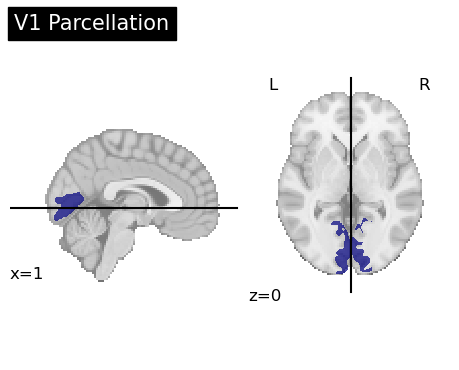

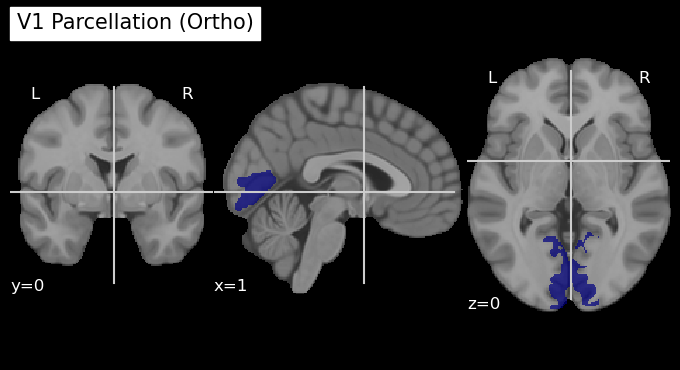

In [99]:
import numpy as np
import nilearn.plotting as nip
from nilearn.image import load_img, resample_to_img, new_img_like
from nilearn.datasets import load_mni152_template
from nilearn.regions import connected_regions
from pathlib import Path

# Load the Glasser 360 parcellation image
parcellation_img = load_img('C:/Users/user/Documents/l/glasser360-master/glasser360MNI.nii.gz')

# Load the node names
with open('C:/Users/user/Documents/l/glasser360-master/glasser360NodeNames.txt', 'r') as f:
    node_names = [line.strip() for line in f]

# Load the MNI152 template brain image
template_img = load_mni152_template()

# Area to visualize (e.g., V1)
area_to_visualize = 'V1'

# Find the corresponding labels for the area
labels = [i + 1 for i, name in enumerate(node_names) if area_to_visualize in name]

# Create a mask for the specified area
parcellation_data = parcellation_img.get_fdata()
mask = np.isin(parcellation_data, labels)

# Resample the mask to the template image
resampled_mask_img = resample_to_img(new_img_like(parcellation_img, mask.astype(np.int16)), template_img)

# Extract connected regions from the mask
connected_regions_img, _ = connected_regions(resampled_mask_img, min_region_size=100, extract_type='connected_components')

# Define output directory and save the parcellation image
output_dir = Path.cwd() / "results" / "glasser360_parcellation"
output_dir.mkdir(exist_ok=True, parents=True)
print(f"Output will be saved to: {output_dir}")
connected_regions_img.to_filename(output_dir / f"{area_to_visualize}_parcellation.nii.gz")

# Plot the parcellation using the 'xz' display mode
first_plot = nip.plot_roi(connected_regions_img, title=f"{area_to_visualize} Parcellation", display_mode="xz")

# Grab cut coordinates from this plot to use as a common reference for other plots
cut_coords = first_plot.cut_coords

# Adjust cut_coords for ortho display mode (which requires 3 coordinates)
if len(cut_coords) == 2:
    cut_coords = (cut_coords[0], 0, cut_coords[1])  # Assume y=0 if not provided


nip.show()
